# Final Project of Introduction to Bioinformatics

## Find The Imposter - Deciphering Mysterious Sequences

#### TA: Javad Razi (j.razi@outlook.com)

## Project Description: The Genomic Detective - Delving into Avian DNA with Galaxy

### Overview

Welcome to an exploratory journey into the world of bioinformatics, where we will delve into the DNA of flying species. This project presents a unique opportunity to unravel a genomic mystery using Galaxy, a sophisticated yet user-friendly bioinformatics platform. Your mission is to assemble a genome from short-read sequences, revealing insights into a specific DNA sequence found in various avian species. Along the way, you'll learn to navigate the complexities of genome assembly and conduct detailed BLAST searches, piecing together a puzzle millions of years in the making.

### Objectives and Workflow

1. **Introduction and Setup with Galaxy:**
   - Start by exploring the Galaxy platform, designed for bioinformatics analysis. You can find a comprehensive introduction and a step-by-step guide on how to use Galaxy, including how to set up your work environment and get data into Galaxy, at the [Galaxy Project Training Network](https://training.galaxyproject.org/). This resource provides a hands-on introduction to Genomics and Galaxy, covering basic aspects like creating a new history and using the Get Data toolbox.

2. **Genome Assembly:**
   - For learning about genome assembly methods, the [Galaxy Project Training Network](https://training.galaxyproject.org/) offers a variety of resources and guides. This site provides access to a wide range of learning materials, helping users to understand the intricacies of genome assembly within the Galaxy platform.

3. **Performing BLAST Searches:**
   - To understand how to perform BLAST searches using Galaxy, the NCBI BLAST User Guide remains a crucial resource. You can access it at [NCBI's BLAST User Guide](https://www.ncbi.nlm.nih.gov/books/NBK279690/). This guide offers detailed instructions and insights into using BLAST for sequence comparison and analysis.

4. **Comparative Genomics and Analysis:**
   - Compare your findings against existing genomic data. This comparative analysis will help you shed light on the unique aspects of your assembled sequence and its significance in avian genetics.

### Specific Deliverables

- **Complete Code:** Submit all the code you used for assembling the genome, performing BLAST searches, and further analysis. Ensure your code is well-commented and organized for clarity.
- **Assembled Genome Fasta File:** Provide the fasta file of the assembled genome. This should be the direct output of your assembly process.
- **BLAST Results CSV File:** Include a CSV file with the results from your BLAST searches. This file should contain detailed information about any genomic matches found.
- **Detailed Interpretation:** At the end of your notebook, include a thorough interpretation of your findings. Discuss the significance of the sequence within the avian genome, any similarities or differences with sequences in other species, and the potential implications of these results. Your interpretation should be grounded in the data analysis conducted.

In [16]:
import sys
import subprocess
import pkg_resources

def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

REQUIRED_PACKAGES = [
    'bioblend',
    'biopython',
    'pandas'
]

for package in REQUIRED_PACKAGES:
    try:
        dist = pkg_resources.get_distribution(package)
        print('{} ({}) is installed'.format(dist.key, dist.version))
    except pkg_resources.DistributionNotFound:
        print('{} is NOT installed'.format(package))
        install(package)
        print('{} was successfully installed.'.format(package))

bioblend (1.2.0) is installed
biopython (1.83) is installed
pandas (1.5.3) is installed


## Part 1: Assembling Using Galaxy

#### Option 1: Python Notebook

Finish this section of notebook to assemble a genome from a fasta file with short-read sequences.

#### Option 2: Galaxy Web Interface

Alternatively, you can use the Galaxy web interface at usegalaxy.org to complete the assembly. This approach allows you to experience the ease and efficiency of Galaxy's web-based tools.


In [ ]:
!pip install python-dotenv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from dotenv import load_dotenv
import os

# Load environment variables from .env file
load_dotenv(dotenv_path='/content/drive/MyDrive/.env.template')

# You can create your API key by registering at usegalaxy website, and from user settings section.
# It is recommended that you store this key as an environment variable, and not expose it!
api_key = '6500417f818e61bd51b95d8339abb260'
# api_key = os.getenv('6500417f818e61bd51b95d8339abb260')

In [ ]:
import bioblend.galaxy

# Initialize Galaxy instance
gi = bioblend.galaxy.GalaxyInstance(url='https://usegalaxy.org/', key=api_key)

In [ ]:
# Upload the fasta file to Galaxy
fasta_path = '/content/drive/MyDrive/short_reads.fasta'
fasta_hist = gi.histories.create_history(name="FindTheImposterTask_Fasta")
fasta_dict = gi.tools.upload_file(fasta_path, fasta_hist['id'], type='fasta')

fasta_dict

{'outputs': [{'id': 'f9cad7b01a47213567858a560fada58f',
   'hda_ldda': 'hda',
   'uuid': 'c72e31b2-21f1-4c33-a6c7-ba09cf711faf',
   'hid': 1,
   'file_ext': 'auto',
   'peek': None,
   'model_class': 'HistoryDatasetAssociation',
   'name': 'short_reads.fasta',
   'deleted': False,
   'purged': False,
   'visible': True,
   'state': 'queued',
   'history_content_type': 'dataset',
   'file_size': 0,
   'create_time': '2024-02-04T09:03:49.601259',
   'update_time': '2024-02-04T09:03:49.631542',
   'data_type': 'galaxy.datatypes.data.Data',
   'genome_build': '?',
   'validated_state': 'unknown',
   'validated_state_message': None,
   'misc_info': None,
   'misc_blurb': None,
   'tags': [],
   'history_id': 'cc3018c3e27abc55',
   'metadata_dbkey': '?',
   'output_name': 'output0'}],
 'output_collections': [],
 'jobs': [{'model_class': 'Job',
   'id': 'bbd44e69cb8906b56668d1f0082d5363',
   'state': 'new',
   'exit_code': None,
   'update_time': '2024-02-04T09:03:49.658727',
   'create_time'

In [ ]:
assembly_tool_name = 'Trinity'
assembly_tool = gi.tools.get_tools(name=assembly_tool_name)[0]

assembly_params = {
    'mode_sel': 'auto',
    'operation_mode': 'de_novo_genome_assembly',
}

# Run the Assembly Tool
try:
    assembly_dict = gi.tools.run_tool(fasta_hist['id'], assembly_tool['id'], assembly_params)
except ConnectionError as e:
    print(f"Failed to run the assembly tool: {e}")
    raise

# Wait for the assembly job to complete
assembly_dict = gi.jobs.wait_for_job(job_id=assembly_dict['jobs'][0]['id'], maxwait=120, interval=5, check=True)


In [ ]:
assembly_dict

{'model_class': 'Job',
 'id': 'bbd44e69cb8906b57919e0f4f22e5729',
 'state': 'ok',
 'exit_code': 0,
 'update_time': '2024-02-04T09:05:34.584637',
 'create_time': '2024-02-04T09:05:04.551463',
 'galaxy_version': '23.2',
 'command_version': None,
 'copied_from_job_id': None,
 'tool_id': 'toolshed.g2.bx.psu.edu/repos/iuc/trinity/trinity/2.9.1+galaxy2',
 'history_id': 'cc3018c3e27abc55',
 'params': {'pool': '{"__current_case__": 0, "inputs": {"__current_case__": 0, "input": {"values": [{"id": 122394119, "src": "hda"}]}, "paired_or_single": "single", "strand": {"__current_case__": 0, "is_strand_specific": false}}, "pool_mode": "Yes"}',
  'norm': 'true',
  'additional_params': '{"guided": {"__current_case__": 0, "is_guided": "no"}, "long_reads": null, "min_contig_length": "200", "min_kmer_cov": "1"}',
  'chromInfo': '"/cvmfs/data.galaxyproject.org/managed/len/ucsc/?.len"',
  'dbkey': '"?"',
  '__input_ext': '"fasta"'},
 'inputs': {'pool|inputs|input': {'id': 'f9cad7b01a47213567858a560fada58f'

In [ ]:
# Download the assembled genome from Galaxy. You can use the `download_dataset` method. A FASTA file, containing assembly
# of the whole sequence is what we expect here.

dataset_id = 'f9cad7b01a4721352ff795aea6b14a48'

try:
    gi.datasets.download_dataset(dataset_id)
    print(f"Dataset {dataset_id} downloaded successfully")
except Exception as e:
    print(f"Failed to download dataset {dataset_id}: {e}")

Dataset f9cad7b01a4721352ff795aea6b14a48 downloaded successfully


### Part 2: Using BLAST to Query The Assembled Sequence

In this part of the notebook, you will utilize the NCBI BLAST API to analyze the genome sequence you've assembled. This involves integrating the API into your notebook, submitting your sequence for BLAST querying, and then meticulously examining the results. Your focus will be on identifying similarities or unique traits in the sequence compared to others in the NCBI database, particularly exploring its relationship with known sequences in various species. This step is crucial for understanding the evolutionary and biological significance of your assembled genome.

**Note**: Unlike the previous section, for this one, you must deliver the full code in the notebook. Doing this part using website will not be graded.

In [17]:
# Import necessary libraries
from Bio.Blast import NCBIWWW
from Bio.Blast import NCBIXML
from collections import defaultdict


In [ ]:
# Load the assembled genome
with open('/content/drive/MyDrive/Galaxy2-[Trinity_on_data_1__Assembled_Transcripts].fasta', 'r') as file:
    assembled_genome = file.read()

assembled_genome

'>TRINITY_DN0_c0_g1_i1 len=3002 path=[0:0-1724 1:1725-1725 2:1726-3001]\nTGCTCATTTGAAAGCTTATGCAAAAATTAACGAGGAATCACTGGATAGGGCTAGGAGATTGCTTTGGTGGCATTACAACTGTTTACTGTGGGGAGAAGCTCAAGTTACTAACTATATTTCTCGTTTGCGTACTTGGTTGTCAACTCCTGAGAAATATAGAGGTAGAGATGCCCCGACCATTGAAGCAATCACTAGACCAATCCAGGTGGCTCAGGGAGGCAGAAAAACAACTACGGGTACTAGAAAACCTCGTGGACTCGAACCTAGAAGAAGAAAAGTTAAAACCACAGTTGTCTATGGGAGAAGACGTTCAAAGTCCCGGGAAAGGAGAGCCCCTACACCCCAACGTGCGGGCTCCCCTCTCCCACGTAGTTCGAGCAGCCACCATAGATCTCCCTCGCCTAGGAAATAAATTACCTGCTAGGCATCACTTAGGTAAATTGTCAGGACTATATCAAATGAAGGGCTGTACTTTTAACCCAGAATGGAAAGTACCAGATATTTCGGATACTCATTTTAATTTAGATGTAGTTAATGAGTGCCCTTCCCGAAATTGGAAATATTTGACTCCAGCCAAATTCTGGCCCAAGAGCATTTCCTACTTTCCTGTCCAGGTAGGGGTTAAACCAAAGTATCCTGACAATGTGATGCAACATGAATCAATAGTAGGTAAATATTTAACCAGGCTCTATGAAGCAGGAATCCTTTATAAGCGGATATCTAAACATTTGGTCACATTTAAAGGTCAGCCTTATAATTGGGAACAGCAACACCTTGTCAATCAACATCACATTTATGATGGGGCAACATCCAGCAAAATCAATGGACGTCAGACGGATAGAAGGAGGAGAAATACTGTTAAACCAACTTGCCGGAAGGATGATCCCAAAAGGGACTTTGACATGGTCAGGCAAGTTTCCAACACTA

In [15]:
from Bio.Blast import NCBIWWW

# Perform the BLAST query, filtering for eukaryotes

result_handle = NCBIWWW.qblast(program='blastn',
                               database='nt',
                               sequence=assembled_genome,
                               entrez_query='txid2759[ORGN]', # Only filter Eucaryotes. Hint: You can do this by giving their taxonomy id.
                               hitlist_size=100,
                               word_size=16)


In [18]:
from Bio.Blast import NCBIXML

blast_records = NCBIXML.parse(result_handle)

blast_records

<generator object parse at 0x7cf09bfe04a0>

In [19]:
import pandas as pd
from Bio import Entrez

# Set your email here for Entrez
Entrez.email = "khosrojerditarane@gmail.com"

def fetch_taxonomy_info(accession):
    """
    Fetch taxonomy information using Entrez for a given accession number.
    """
    handle = Entrez.efetch(db="nucleotide", id=accession, retmode="xml")
    records = Entrez.read(handle)
    handle.close() # Close the handle to avoid memory leaks

    taxonomy = records[0]["GBSeq_taxonomy"]
    species = records[0]["GBSeq_organism"]

    return taxonomy, species


def parse_blast_results():
    """
    Parse BLAST results and extract relevant information including taxonomy.
    """
    blast_results = []

    for record in blast_records:
        for alignment in record.alignments:
            accession = alignment.accession
            taxonomy, species = fetch_taxonomy_info(accession)
            for hsp in alignment.hsps:
                # These fields are required in your submission
                blast_results.append({
                    'query_id': record.query_id,
                    'alignment_title': alignment.title,
                    'e_value': hsp.expect,
                    'identity': hsp.identities,
                    'accession': accession,
                    'taxonomy': taxonomy,
                    'species': species
                })
    return blast_results


blast_results = parse_blast_results()
df = pd.DataFrame(blast_results)
df.to_csv('/content/drive/MyDrive/blast_results_with_taxonomy.csv', index=False)

df.head()

,query_id,alignment_title,e_value,identity,accession,taxonomy,species
0,Query_234984,gi|389587610|gb|JQ978784.1| Melopsittacus undu...,0.000000e+00,1168,JQ978784,Eukaryota; Metazoa; Chordata; Craniata; Verteb...,Melopsittacus undulatus
1,Query_234984,gi|389587610|gb|JQ978784.1| Melopsittacus undu...,4.358760e-61,532,JQ978784,Eukaryota; Metazoa; Chordata; Craniata; Verteb...,Melopsittacus undulatus
2,Query_234984,gi|389587608|gb|JQ978782.1| Melopsittacus undu...,0.000000e+00,1168,JQ978782,Eukaryota; Metazoa; Chordata; Craniata; Verteb...,Melopsittacus undulatus
3,Query_234984,gi|389587608|gb|JQ978782.1| Melopsittacus undu...,1.853390e-59,531,JQ978782,Eukaryota; Metazoa; Chordata; Craniata; Verteb...,Melopsittacus undulatus
4,Query_234984,gi|389587607|gb|JQ978781.1| Melopsittacus undu...,0.000000e+00,1168,JQ978781,Eukaryota; Metazoa; Chordata; Craniata; Verteb...,Melopsittacus undulatus


## Analysis of The Results

### Drawing Your Own Conclusions

Now that you have completed the BLAST search, a fascinating part of your journey begins – interpreting the data. This stage is where your critical thinking and creativity come into play. From now on, the rest of the notebook will be about whatever you want it to be. Any path that leads to meaningful insights about the data and provides a solid conclusion for the task is acceptable. Let's explore some possible directions:

1. **Species-Specific Patterns:** Examine if the sequence is found exclusively or predominantly in certain species. What could this suggest about its evolution and adaptation? While the focus is not on finding a 'correct' answer, pondering this aspect can lead to interesting hypotheses about species-specific interactions.

2. **Functional Insights:** Reflect on the potential roles this sequence might play within the genomes where it's found. Could it be integral to certain biological functions, or a legacy of ancient genomic events?

3. **Comparative Genomics:** Compare your findings with sequences in other species. Notice any striking similarities or differences? These comparisons could shed light on the sequence's evolutionary journey.

4. **Ecological and Environmental Context:** Consider the ecological and environmental factors that might influence the distribution and evolution of this sequence. How might habitat or lifestyle of the species play a role in its presence or absence?

### Additional Tips and Encouragement

This project is more about the learning journey and less about achieving perfect results. Here are some additional pointers:

1. **Deep Dives:** Encourage yourself to explore the data thoroughly. Use various bioinformatics tools to gain a holistic understanding.

2. **Creative Visualization:** Craft visual representations of your analysis. Effective use of charts or infographics can provide insightful perspectives.

3. **Open-Ended Exploration:** Feel free to extend your analysis in directions you find intriguing. This could include phylogenetic studies or exploring the ecological aspects of the sequence.

Remember, this project is designed to be a learning experience. We don't expect you to uncover all the answers but rather to engage thoughtfully with the data and enjoy the process of discovery.

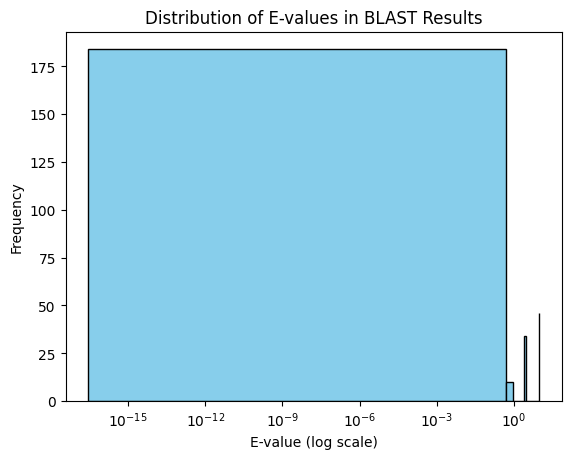

In [24]:
import matplotlib.pyplot as plt

df['e_value'] = pd.to_numeric(df['e_value'], errors='coerce')

# Plot a histogram of E-values
plt.hist(df['e_value'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.xscale('log')  # Use a logarithmic scale for better visualization
plt.xlabel('E-value (log scale)')
plt.ylabel('Frequency')
plt.title('Distribution of E-values in BLAST Results')
plt.show()


<ipython-input-26-2179281c1d1d>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='identity', y='species', data=mean_identity_by_species, palette='viridis')


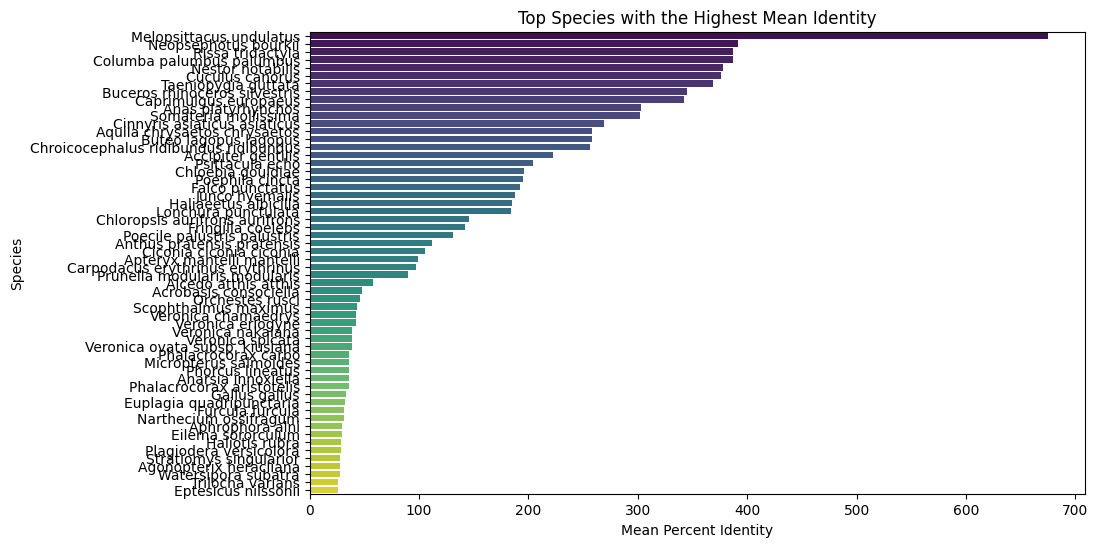

In [26]:
import seaborn as sns

mean_identity_by_species = df.groupby('species')['identity'].mean().reset_index()

mean_identity_by_species = mean_identity_by_species.sort_values(by='identity', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='identity', y='species', data=mean_identity_by_species, palette='viridis')
plt.xlabel('Mean Percent Identity')
plt.ylabel('Species')
plt.title('Top Species with the Highest Mean Identity')
plt.show()

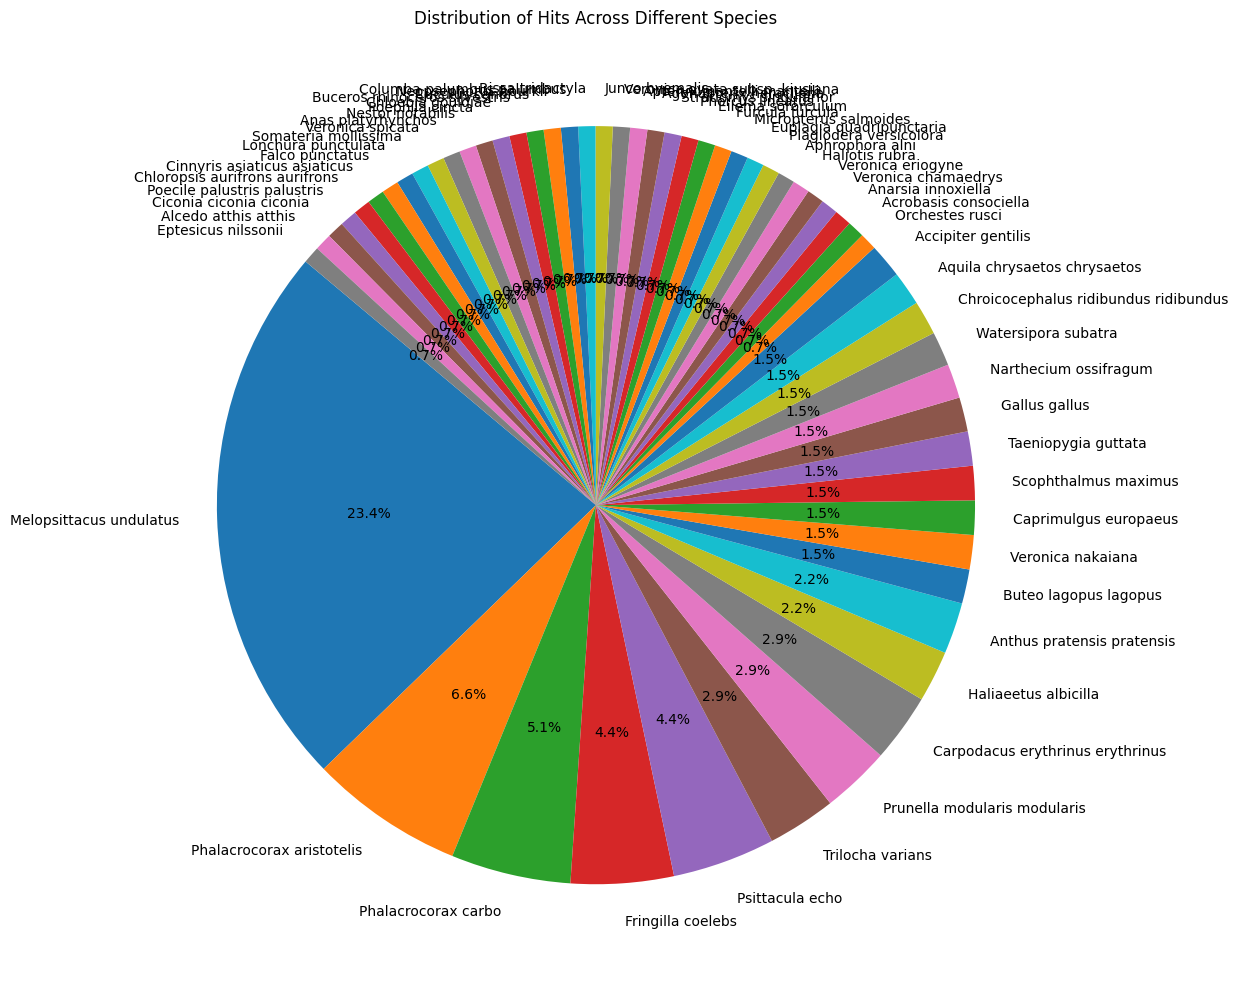

In [31]:
species_counts = df['species'].value_counts()

plt.figure(figsize=(17, 10))
# plt.bar(species_counts.index, species_counts.values, color='skyblue')
# plt.xlabel('Species')
# plt.ylabel('Number of Hits')
plt.title('Distribution of Hits Across Different Species')
plt.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%', startangle=140)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


As shown in the above plot, The assembled genome has the most similarity to "Melopsittacus undulatus" specie. other species have a noticable differnce in mean percent identity.